<a href="https://colab.research.google.com/github/taechanha/inverseDesignMetaMatl/blob/main/%5Br%5D_target_distribution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
###################### FROM HERE ######################
###################### FROM HERE ######################
###################### FROM HERE ######################
###################### FROM HERE ######################
###################### FROM HERE ######################
###################### FROM HERE ######################
###################### FROM HERE ######################
###################### FROM HERE ######################

import numpy as np
import matplotlib.pyplot as plt

f = open("/content/dataset_2.txt", 'r')
data = []
length = 0
for i in f:
  new = []
  new.append(i)
  data.append(new)
  # length of dataset
  length += 1

f.close()

# create dataset from data
dataset = []
for i in range(length):
  new = []
  for j in data[i][0].split(','):
    new.append(float(j))
  dataset.append(new)

print("shape of dataset: ", np.array(dataset).shape)
edge_index = dataset

# trim out label from dataset
# Ex Ey Ez
label = []
new = []
for line in dataset:
  tmp = []
  tmp.append(line.pop(-1))
  tmp.append(line.pop(-1))
  tmp.append(line.pop(-1))
  tmp.reverse()
  label.append(tmp)

print("label.shape: ", np.array(label).shape)

# figure out max length of index list
max = 0
for i in dataset:
    if max < np.sum(i):
        max = np.sum(i)
max = int(max)
print("max: ", max)

# create index list dataset
d_tmp = []
for i in dataset:
    tmp = []
    for e, j in enumerate(i):
        if j == 1:
            tmp.append(e+1)
    if len(tmp) < max:
        tmp += [0] * (max - len(tmp))
    d_tmp.append(tmp)
print("shape of idx_list: ", np.array(d_tmp).shape)
idx_list = d_tmp


# whole dataset to Tensor & train/test split
import os
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

idx_list = torch.FloatTensor(idx_list)
label = torch.FloatTensor(label)

split = int(length * 0.8)

x_train = idx_list[:split]
y_train = label[:split]
x_val = idx_list[split:]
y_val = label[split:]

print("x_train, y_train, x_val shape: ", x_train.shape, y_train.shape, x_val.shape)

# create torch dataset
import os
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

class CustomDataset(Dataset):
    def __init__(self, label, dataset, transform=None, target_transform=None):
        self.labels = label
        self.dataset = dataset
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        data = self.dataset[idx]
        label = self.labels[idx]
        if self.transform:
            data = self.transform(data)
        if self.target_transform:
            label = self.target_transform(label)
        return data, label

# create DataLoader
from torch.utils.data import DataLoader

training_data   = CustomDataset(label=y_train, dataset=x_train)
test_data       = CustomDataset(label=y_val, dataset=x_val)
train_loader    = DataLoader(training_data, batch_size=4, shuffle=True)
test_loader     = DataLoader(test_data, batch_size=4, shuffle=False)

shape of dataset:  (2000, 354)
label.shape:  (2000, 3)
max:  32
shape of idx_list:  (2000, 32)
x_train, y_train, x_val shape:  torch.Size([1600, 32]) torch.Size([1600, 3]) torch.Size([400, 32])


In [ ]:
y_train.shape

torch.Size([1600, 3])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


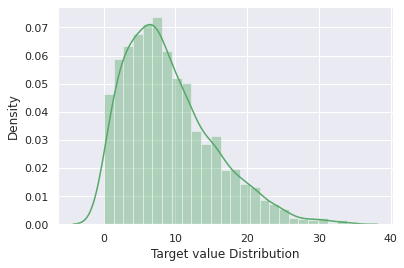

In [ ]:
from sklearn.datasets import load_diabetes
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import pandas as pd

#Organize Data
SR_y = pd.Series(y_train[:, 0], name="Target value Distribution")

#Plot Data
fig, ax = plt.subplots()
sns.distplot(SR_y, color="g", ax=ax)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


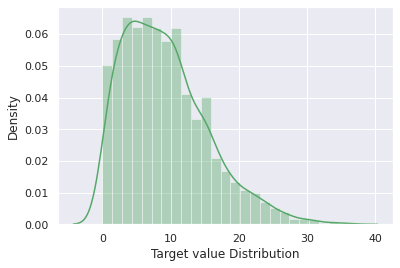

In [ ]:
from sklearn.datasets import load_diabetes
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import pandas as pd

#Organize Data
SR_y = pd.Series(y_train[:, 1], name="Target value Distribution")

#Plot Data
fig, ax = plt.subplots()
sns.distplot(SR_y, color="g", ax=ax)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


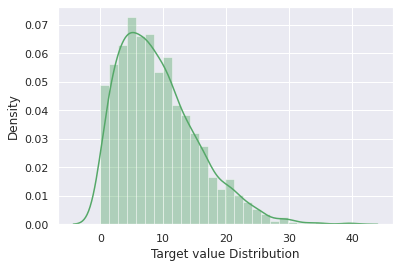

In [ ]:
from sklearn.datasets import load_diabetes
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import pandas as pd

#Organize Data
SR_y = pd.Series(y_train[:, 2], name="Target value Distribution")

#Plot Data
fig, ax = plt.subplots()
sns.distplot(SR_y, color="g", ax=ax)
plt.show()

In [ ]:
# ℎ=2×IQR×𝑛−1/3 . So the number of bins is (max−min)/ℎ

In [ ]:
q75, q25 = np.percentile(y_train[:, 0], [75 ,25])
iqr = q75 - q25
iqr

8.135164141654968

In [ ]:
h = 2 * iqr * len(y_train) ** (-1/3)
max = torch.max(y_train[:, 0])
min = torch.min(y_train[:, 0])
nbin = int((max - min) / h)
nbin

24

In [1]:
#

In [ ]:
from sklearn.datasets import load_diabetes
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import pandas as pd

#Organize Data
SR_y = pd.Series(y_train[:, 0], name="Target value Distribution")

#Plot Data
fig, ax = plt.subplots()
sns.distplot(SR_y, color="g", ax=ax)
plt.show()

<BarContainer object of 5 artists>

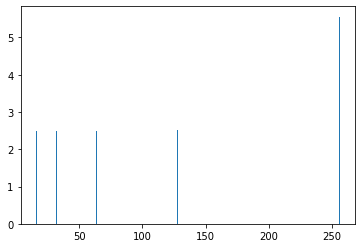

In [4]:
import matplotlib.pyplot as plt
x = [16, 32, 64, 128, 256]
y = [2.4765, 2.4819, 2.4781, 2.5243, 5.5551]
plt.bar(x, y)

In [6]:
!pip install matplotlib --upgrade

     |████████████████████████████████| 10.3 MB 31.4 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


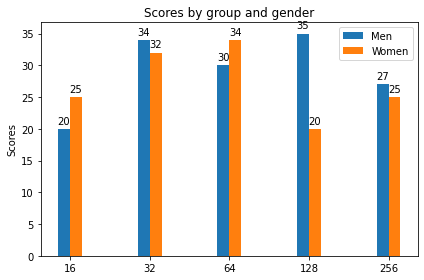

In [37]:
import matplotlib.pyplot as plt
import numpy as np


labels = ['16', '32', '64', '128', '256']
men_means = [20, 34, 30, 35, 27]
women_means = [25, 32, 34, 20, 25]

x = np.arange(len(labels))  # the label locations
width = 0.15  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, men_means, width, label='Men')
rects2 = ax.bar(x + width/2, women_means, width, label='Women')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()

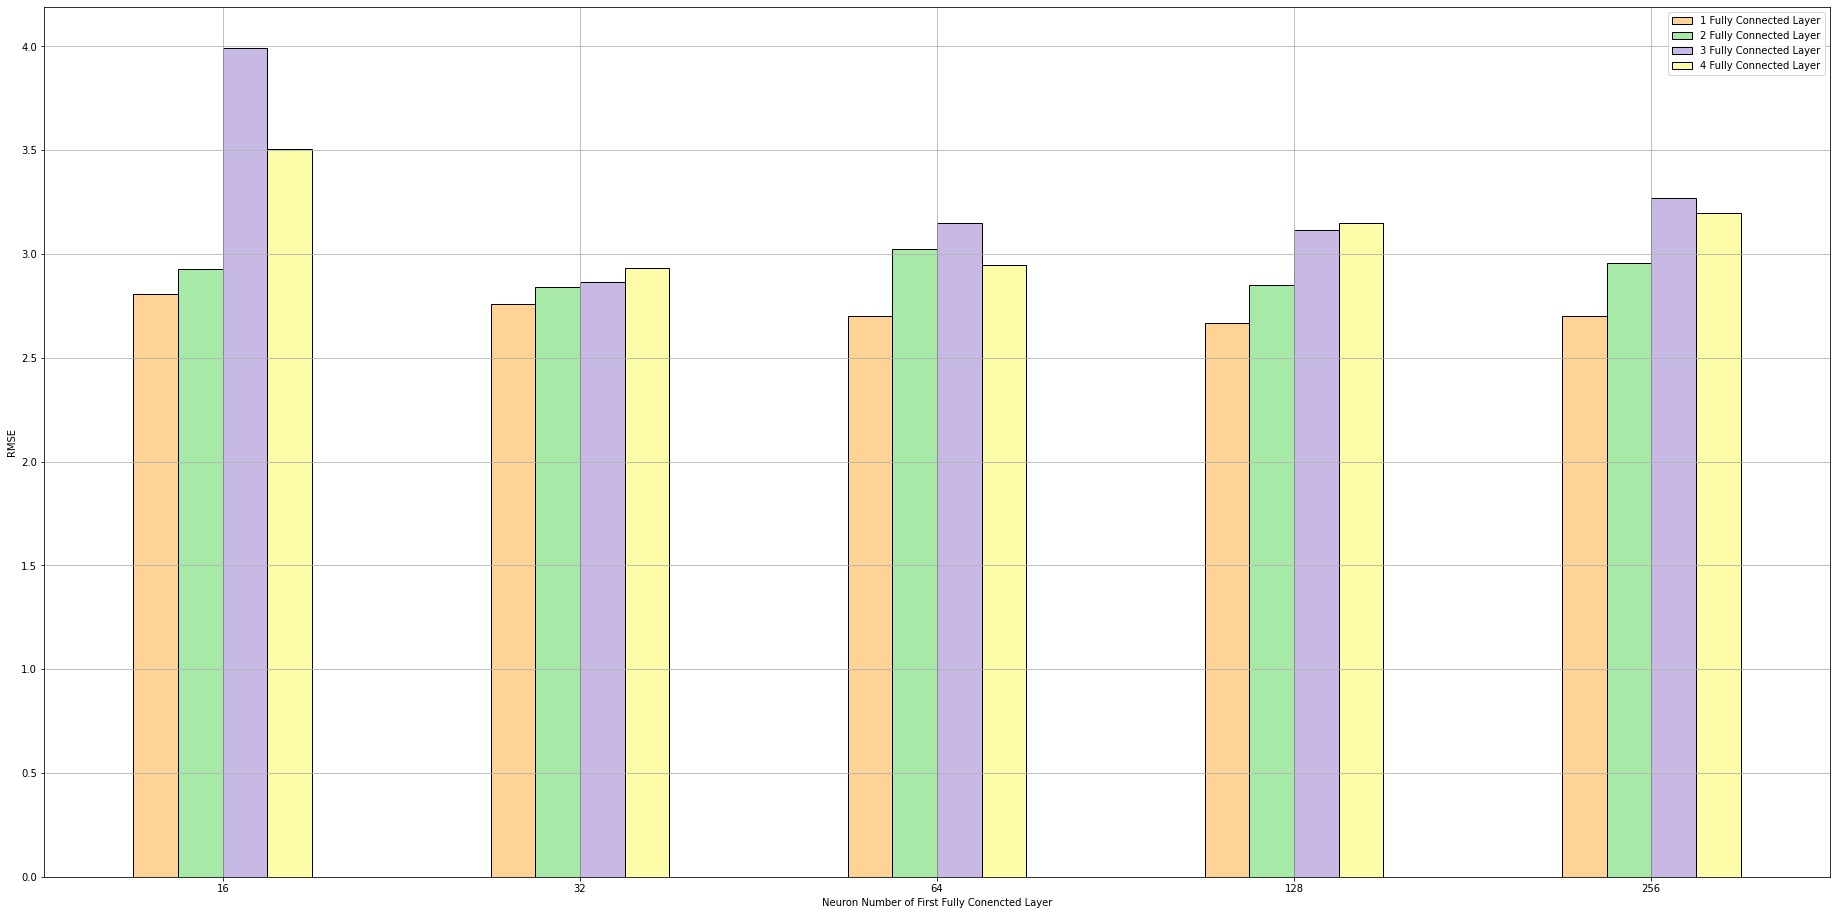

In [110]:
import pandas as pd
df = pd.DataFrame(index=labels)
df['1 Fully Connected Layer'] = [2.8083, 2.7592, 2.6996, 2.6668, 2.7001]
df['2 Fully Connected Layer'] = [2.9294, 2.8394, 3.0240, 2.8531, 2.9547]
df['3 Fully Connected Layer'] = [3.9905, 2.8673, 3.1515, 3.1144, 3.2714]
df['4 Fully Connected Layer'] = [3.5039, 2.9310, 2.9459, 3.1496, 3.1971]
df

from matplotlib import ticker
import matplotlib.pyplot as plt

df.plot(kind='bar', figsize=(, 16), grid=True, edgecolor='black', color=['#ffd396','#a7e9a7','#c7b8e4', '#fdfda9'])
plt.xlabel('Neuron Number of First Fully Conencted Layer')
plt.ylabel('RMSE')
#plt.gca().yaxis.set_major_formatter(ticker.FormatStrFormatter('$%.2f'))
plt.gca().xaxis.set_tick_params(rotation=0)

In [99]:
import pandas as pd
df = pd.DataFrame(index=labels)
df['1 Fully Connected Layer'] = [5.5551, 2.5243, 2.4781, 2.4819, 2.4765]
df['2 Fully Connected Layer'] = [5.5549, 2.5091, 2.4859, 2.5027, 2.5421]
df['3 Fully Connected Layer'] = [5.5559, 5.5548, 2.4615, 2.5173, 2.5549]
df['4 Fully Connected Layer'] = [5.5550, 2.5162, 2.5072, 2.5663, 2.6221]
df

,1 Fully Connected Layer,2 Fully Connected Layer,3 Fully Connected Layer,4 Fully Connected Layer
16,5.5551,5.5549,5.5559,5.5550
32,2.5243,2.5091,5.5548,2.5162
64,2.4781,2.4859,2.4615,2.5072
128,2.4819,2.5027,2.5173,2.5663
256,2.4765,2.5421,2.5549,2.6221


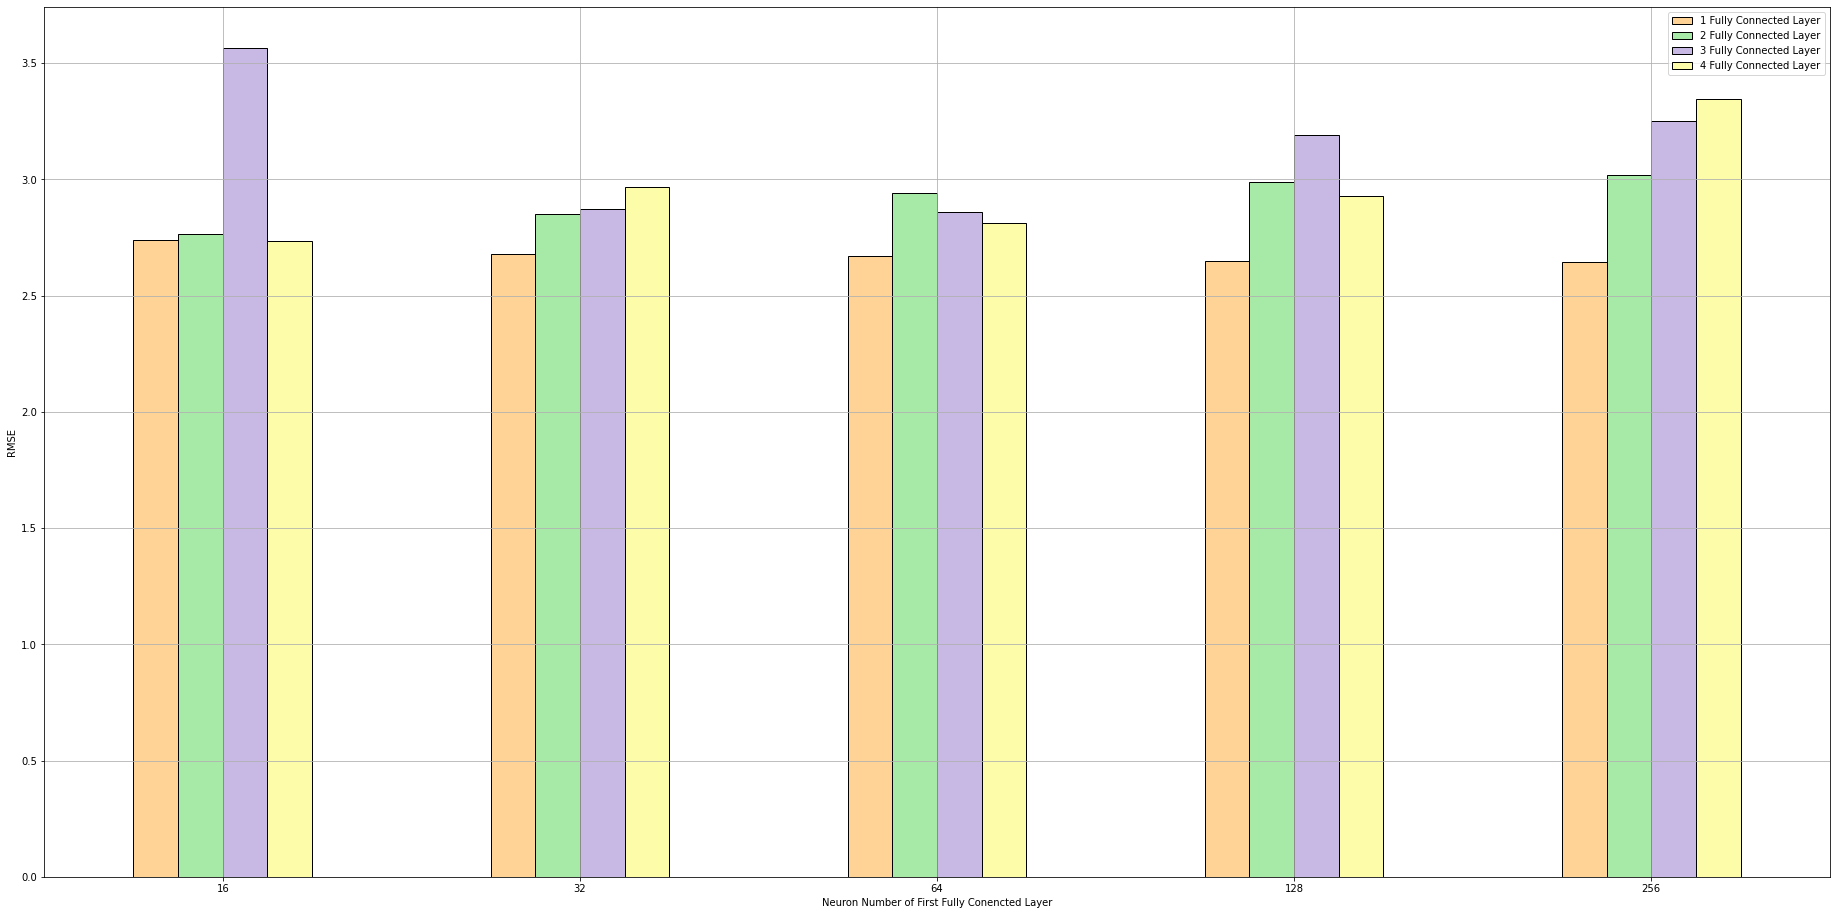

In [109]:
from matplotlib import ticker
import matplotlib.pyplot as plt

df.plot(kind='bar', figsize=(32, 16), grid=True, edgecolor='black', color=['#ffd396','#a7e9a7','#c7b8e4', '#fdfda9'])

plt.xlabel('Neuron Number of First Fully Conencted Layer')
plt.ylabel('RMSE')
#plt.gca().yaxis.set_major_formatter(ticker.FormatStrFormatter('$%.2f'))
plt.gca().xaxis.set_tick_params(rotation=0)

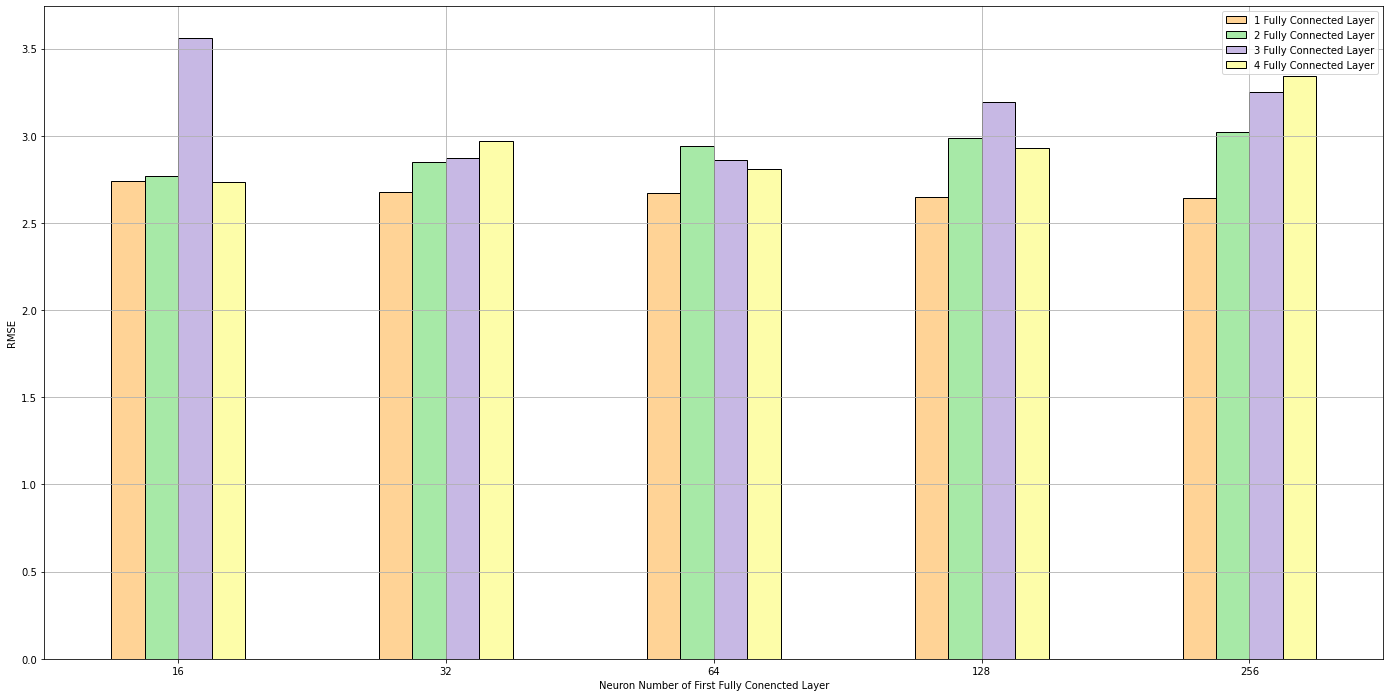

In [111]:
import pandas as pd
df = pd.DataFrame(index=labels)
df['1 Fully Connected Layer'] = [2.7394, 2.6791, 2.6724, 2.6505, 2.6447]
df['2 Fully Connected Layer'] = [2.7669, 2.8497, 2.9430, 2.9888, 3.0201]
df['3 Fully Connected Layer'] = [3.5637, 2.8722, 2.8589, 3.1920, 3.2499]
df['4 Fully Connected Layer'] = [2.7346, 2.9677, 2.8119, 2.9298, 3.3454]

from matplotlib import ticker
import matplotlib.pyplot as plt

df.plot(kind='bar', figsize=(2, 8), grid=True, edgecolor='black', color=['#ffd396','#a7e9a7','#c7b8e4', '#fdfda9'])
plt.xlabel('Neuron Number of First Fully Conencted Layer')
plt.ylabel('RMSE')
#plt.gca().yaxis.set_major_formatter(ticker.FormatStrFormatter('$%.2f'))
plt.gca().xaxis.set_tick_params(rotation=0)